## Reading & Understanding the Dataset 

In [105]:
#Import required modules for datafram manipulation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('MAX_COLUMNS', None)

#Import Scikit Learn module 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
car_data = pd.read_csv("C:\\Users\\TOYIN OLAPE\\Documents\\Stutern\\Data Sets\\CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [29]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Cleaning the Data 

According to the dictionary the data type for "symboling" should not be integer

In [30]:
car_data['symboling'] = car_data['symboling'].astype(str)

In [31]:
pd.DataFrame({'missing':car_data.isna().mean(),
             'unicos':car_data.nunique(),
             'typs': car_data.dtypes})

,missing,unicos,typs
car_ID,0.0,205,int64
symboling,0.0,6,object
CarName,0.0,147,object
fueltype,0.0,2,object
aspiration,0.0,2,object
doornumber,0.0,2,object
carbody,0.0,5,object
drivewheel,0.0,3,object
enginelocation,0.0,2,object
wheelbase,0.0,53,float64


The "CarName" feature lists out the car brand name and the model, this leave us with too many unique variable. To get only the car brand we would split once the split command finds a space. This would also be useful for visualization


In [36]:
car_data['CarName'] = car_data['CarName'].str.split(' ',expand=True)
car_data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Notice that some variables have been spelled wrongly or shortened. For uniformity we would keep one unique name for variable 

In [42]:

car_data['CarName'] = car_data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
car_data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Visualization 

In [32]:
cat_col = car_data.select_dtypes(include=['object']).columns
num_col = car_data.select_dtypes(exclude=['object']).columns
df_cat = car_data[cat_col]
df_num = car_data[num_col]


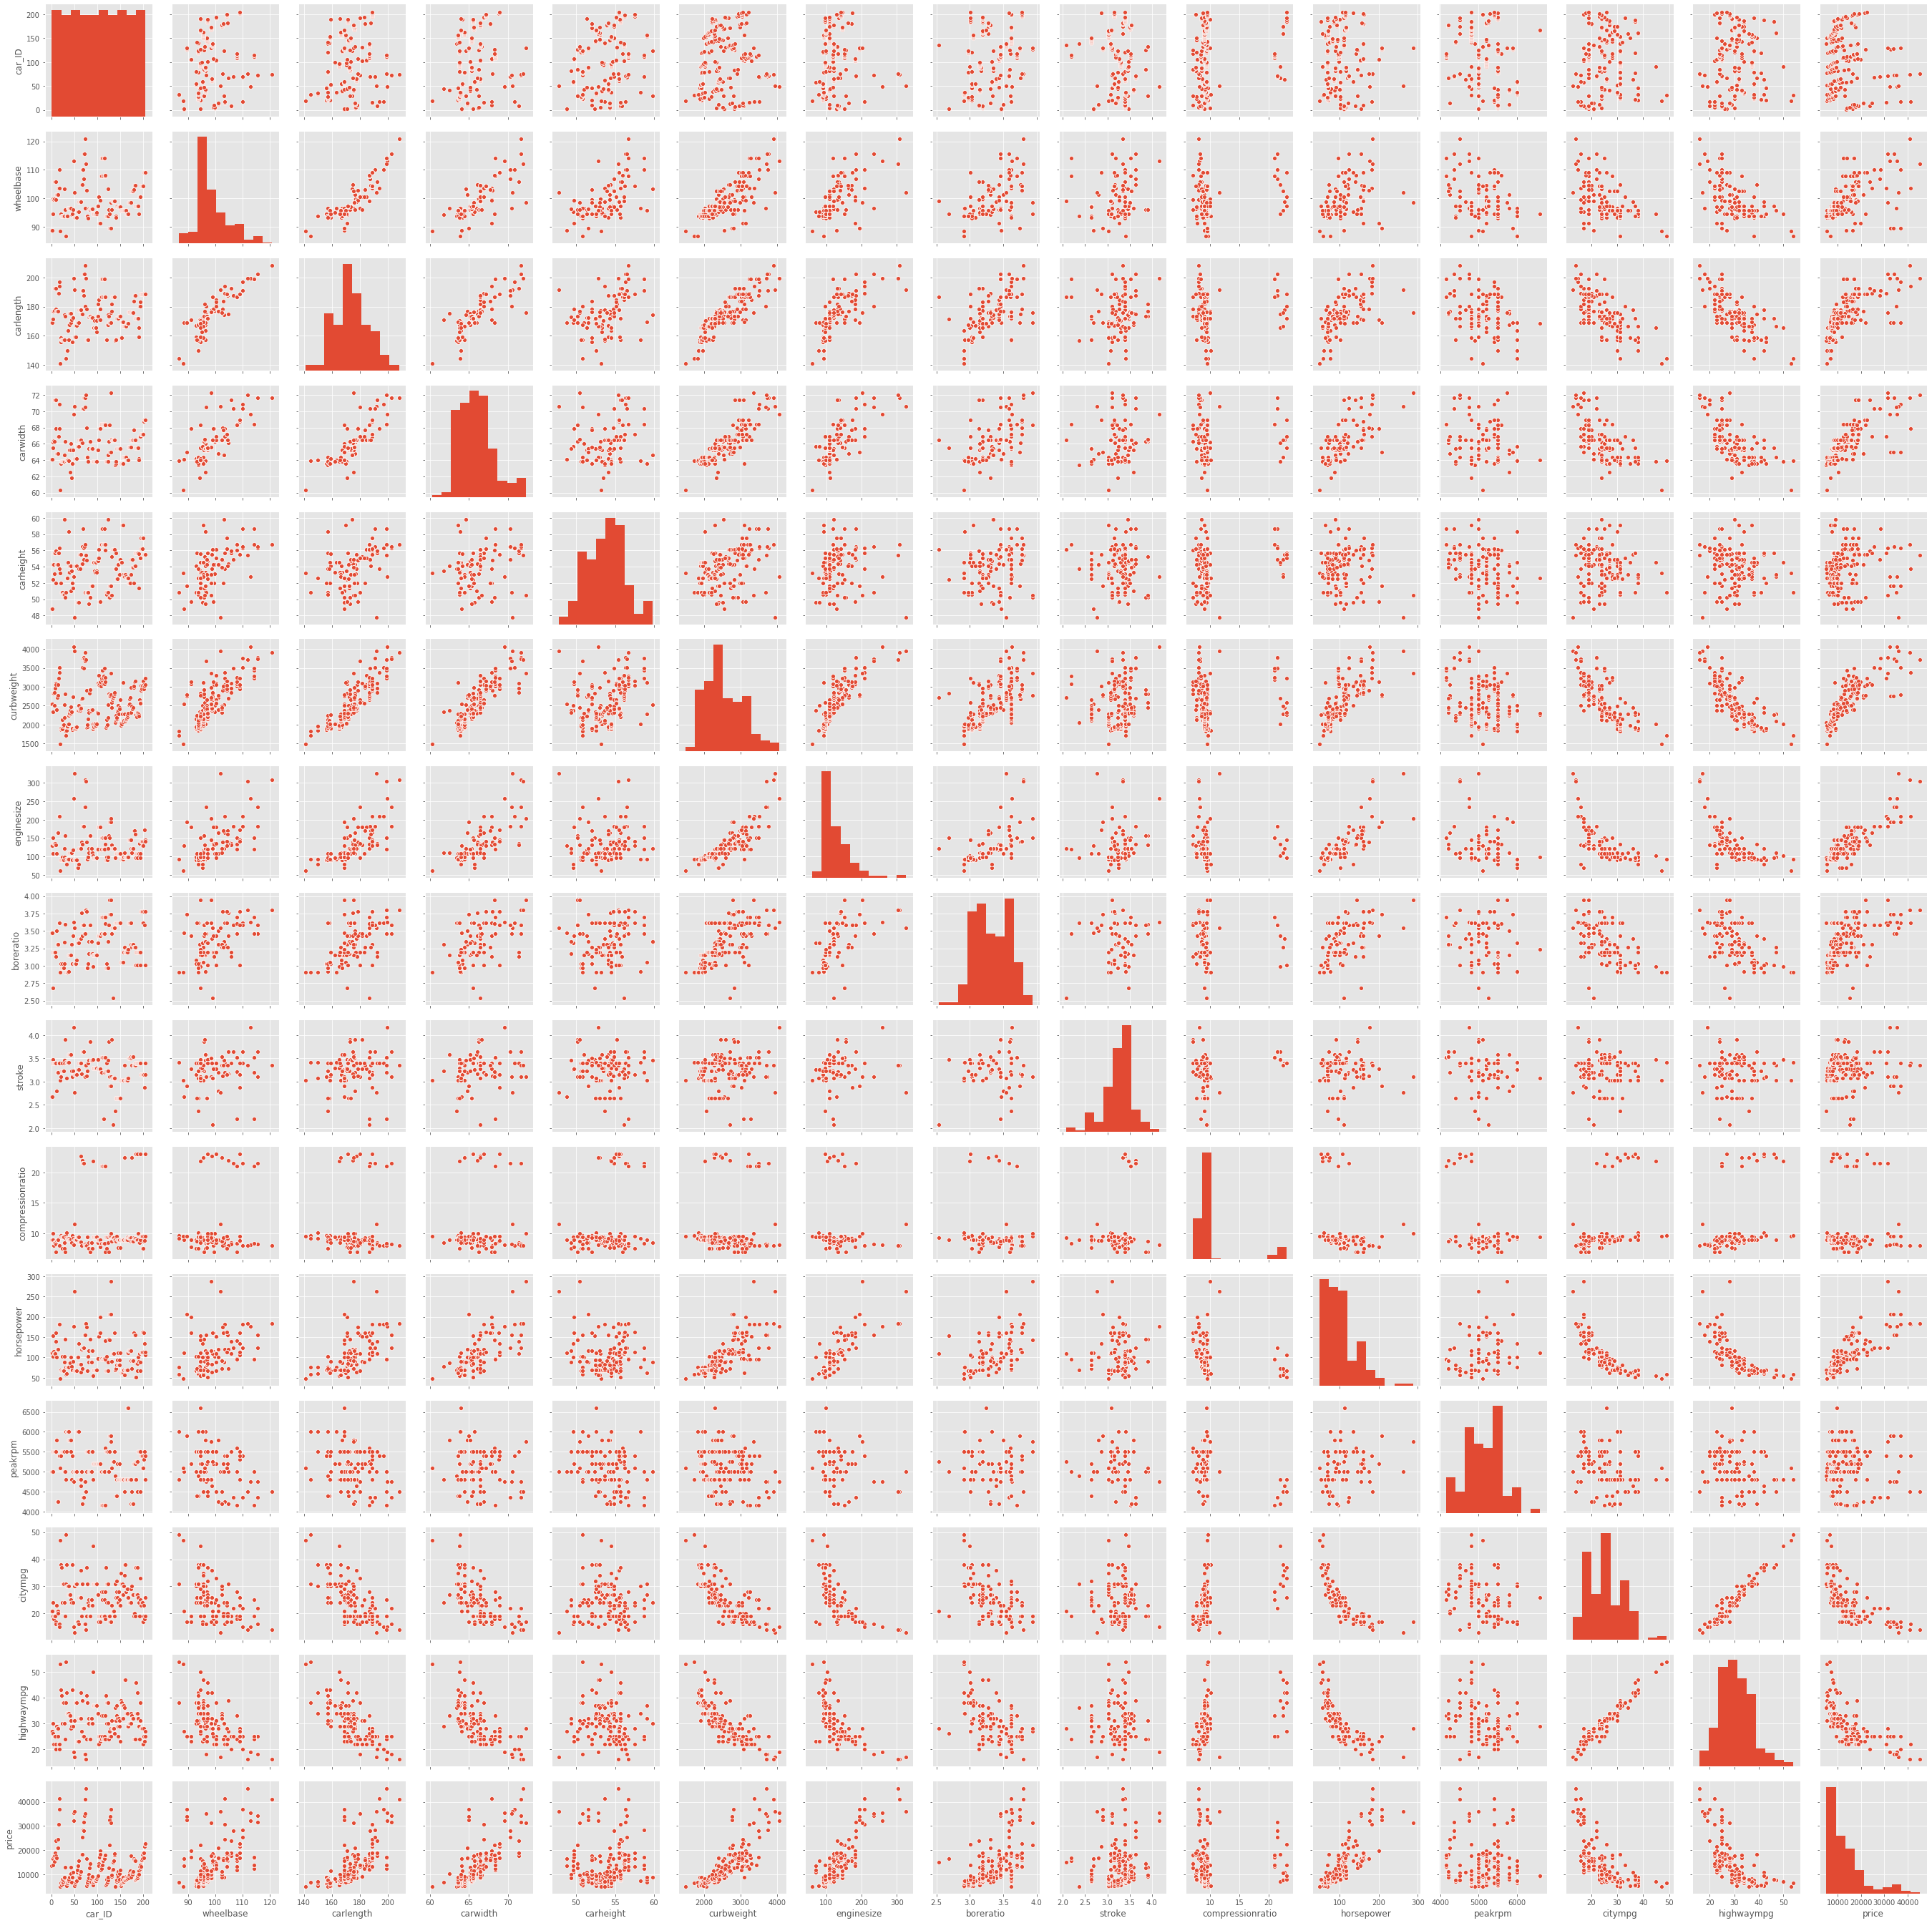

In [47]:
sns.pairplot(car_data[num_col])


Indepth look at the current prices of all the cars and comparing price with the following feature indentified above

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

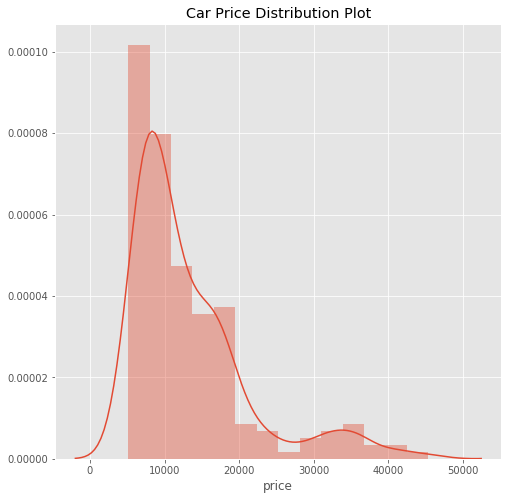

In [33]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(car_data['price'])
car_data["price"].describe()

Text(0, 0.5, 'Count of Cars')

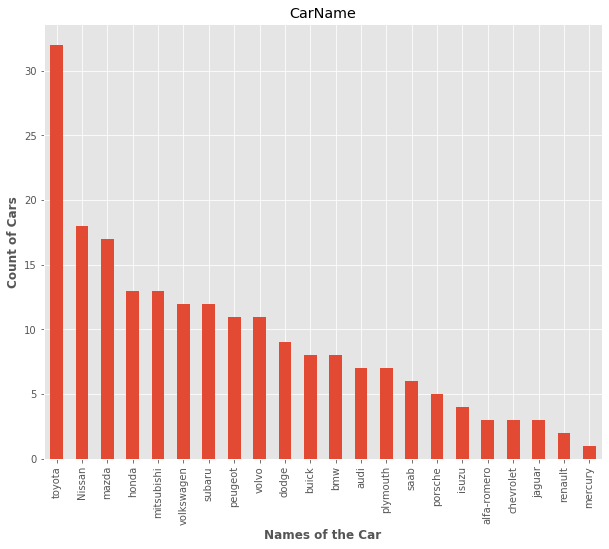

In [45]:
plt.figure(figsize=(10,8))
car_data['CarName'].value_counts().plot(kind='bar',stacked=True)


ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

Text(0.5, 1.0, 'Car Company Brand Name vs Price')

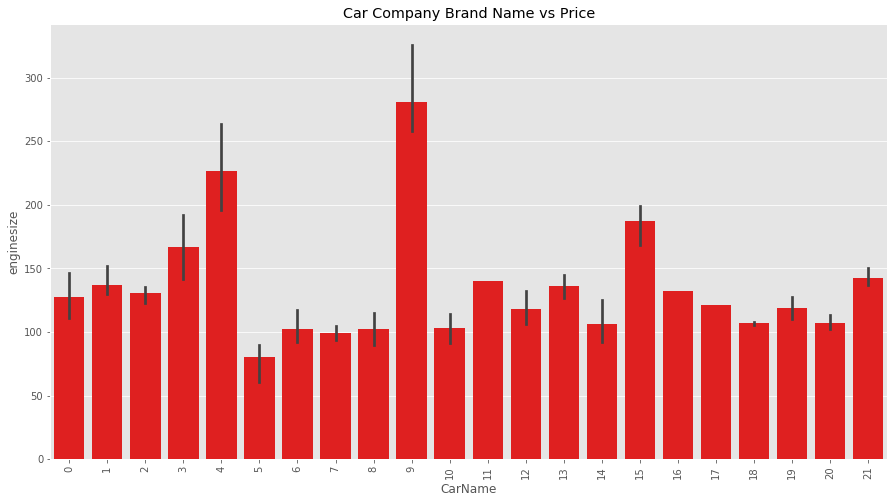

In [111]:
plt.figure(figsize=(15,8))

sns.barplot(x="CarName", y="enginesize", data=car_data, color = "red")
plt.xticks(rotation=90)
plt.title('Car Company Brand Name vs Price')

In [ ]:
The barplot above shows the prices of the various car brands sold in the US. The thick black lines reprresent the range 

<Figure size 1080x576 with 0 Axes>

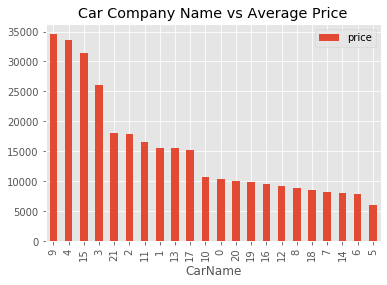

In [112]:
# is this redundant ?

plt.figure(figsize=(15, 8))

car_data1 = pd.DataFrame(car_data.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
car_data1.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#plt.figure(figsize=(15,8))
#sns.barplot(x="CarName", y="price", hue="aspiration", data=car_data)
#plt.xticks(rotation=90)

Visualization for the 5 numerical features considered from pairplot.

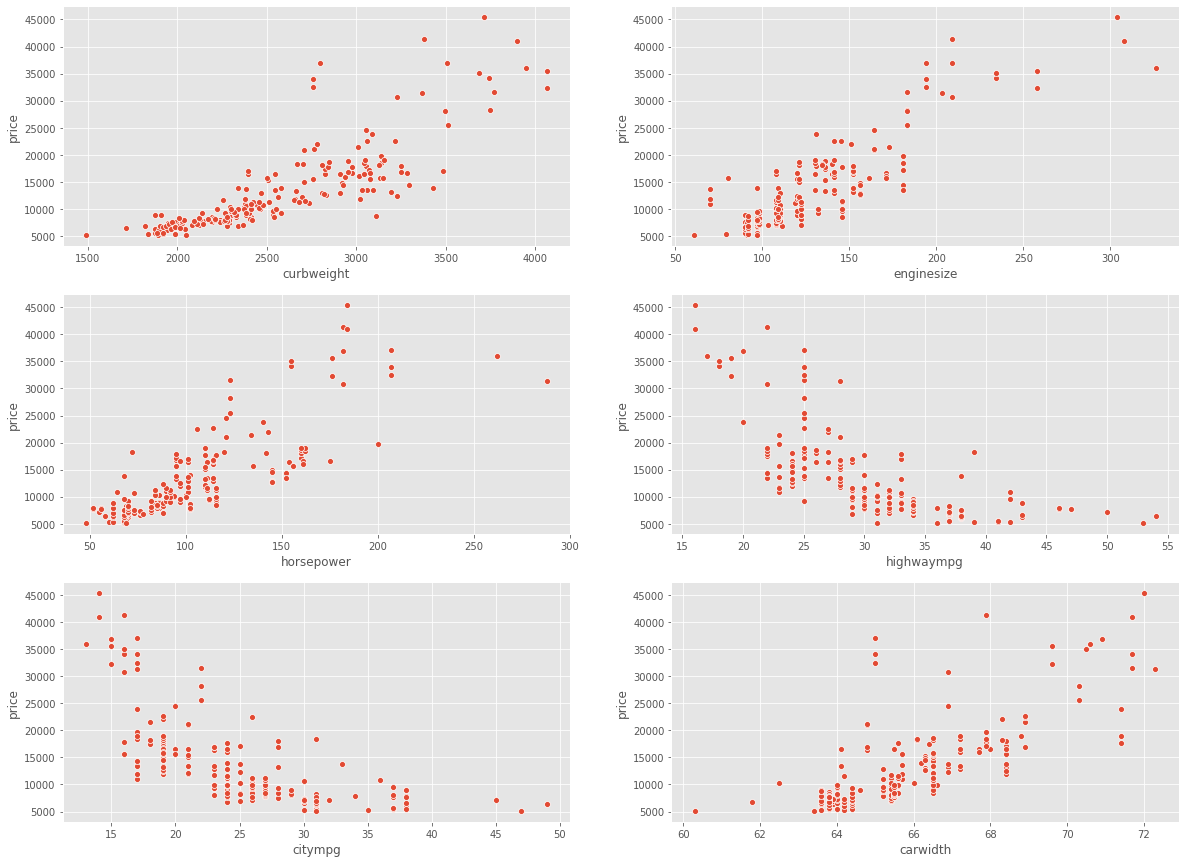

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
sns.scatterplot(x = 'curbweight', y = 'price', data = car_data)
plt.subplot(3,2,2)
sns.scatterplot(x = 'enginesize', y = 'price', data = car_data)
plt.subplot(3,2,3)
sns.scatterplot(x = 'horsepower', y = 'price', data = car_data)
plt.subplot(3,2,4)
sns.scatterplot(x = 'highwaympg', y = 'price', data = car_data)
plt.subplot(3,2,5)
sns.scatterplot(x = 'citympg', y = 'price', data = car_data)
plt.subplot(3,2,6)
sns.scatterplot(x = 'carwidth', y = 'price', data = car_data)

Visualization for 4 categorical features to examine relation with the price

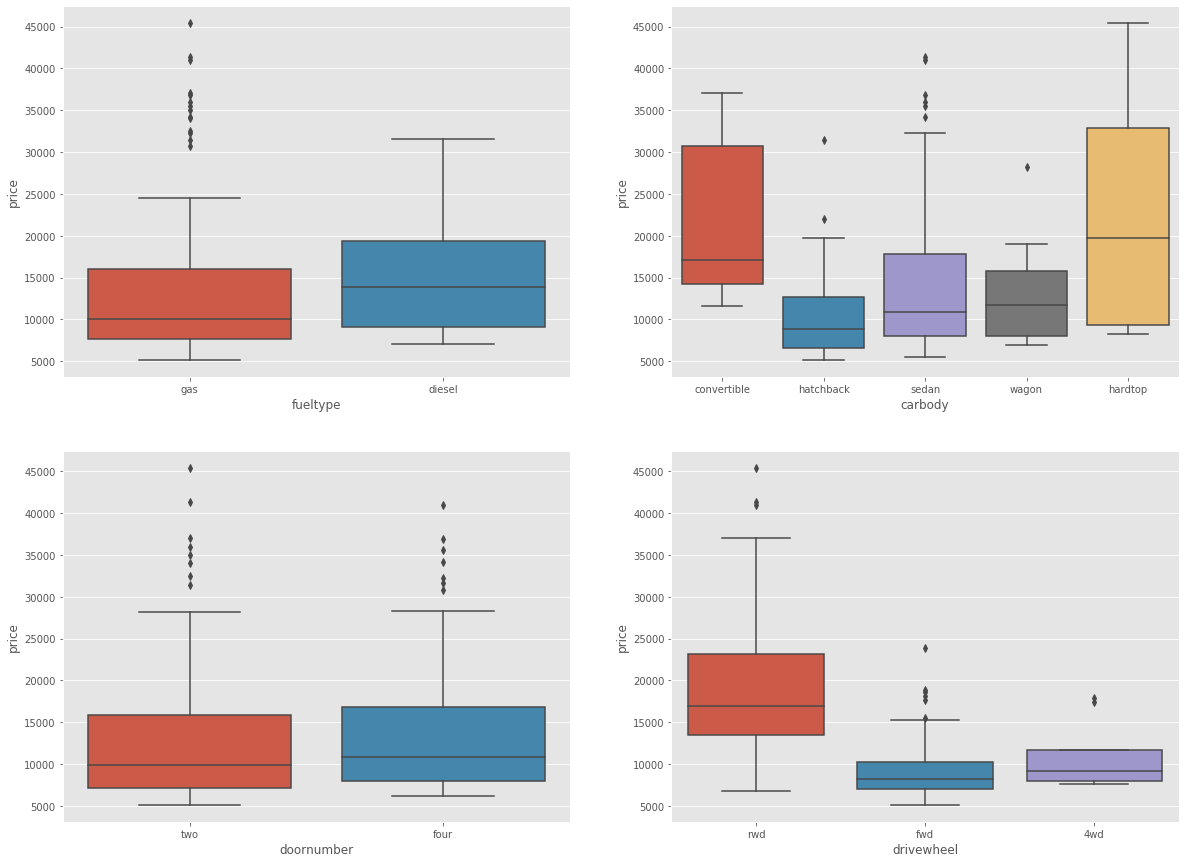

In [71]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data, )
plt.subplot(2,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(2,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(2,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)


### Inference
1. Average deisel car is more expensive that the average gas powered car.
2. With regards to carbody, hardtop has the highest price while hatchback has the lowest price.
3. While there is a prsence of outliers, there isnt a significant disparity between the prices of cars with different number of door.
4. Drivewheel fwd cars are markedly more pricy than both fwd and 4wd drivewheel cars 

## Data Preparation 

Encoding the categorical variables in order to carry out statistics functions on the features.


# lab=LabelEncoder()
car_data['fuelsystem']=lab.fit_transform(car_data['fuelsystem'])
car_data['cylindernumber']=lab.fit_transform(car_data['cylindernumber'])
car_data['enginetype']=lab.fit_transform(car_data['enginetype'])
car_data['enginelocation']=lab.fit_transform(car_data['enginelocation'])
car_data['drivewheel']=lab.fit_transform(car_data['drivewheel'])
car_data['carbody']=lab.fit_transform(car_data['carbody'])
car_data['doornumber']=lab.fit_transform(car_data['doornumber'])
car_data['aspiration']=lab.fit_transform(car_data['aspiration'])
car_data['fueltype']=lab.fit_transform(car_data['fueltype'])
car_data['CarName']=lab.fit_transform(car_data['CarName'])

Check the encoding method and adjust accordingly. ALso number of unique values in a categorical column 

In [84]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


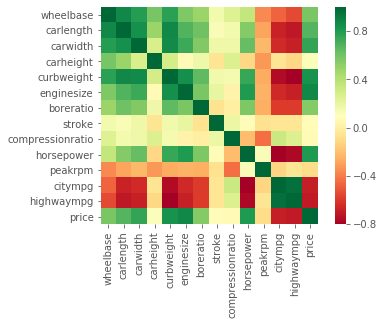

In [14]:
sns.heatmap(car_data.corr(), square=True, cmap='RdYlGn')

From the heat map the following features curbweight,enginesize,horsepowe,are strongly positively correlated with price. While the following festures citympg, highwaympg are strongly negatively correlated with price. 

## Univariate Linear Regression

We would run Linear regressions for the features considered above. This is to further ascertain how well the line of best fit can be used to predict the price i.e R squared.

R squared (Price & Horsepower): 0.653088356490231


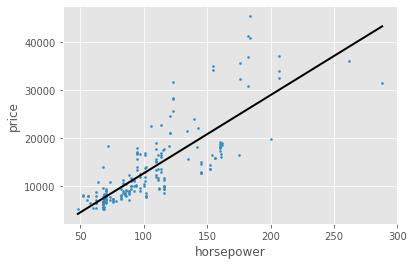

In [15]:
# Create arrays for features and target variable
X_h = car_data['horsepower'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_h = X_h.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_h), max(X_h)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_h, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Horsepower):",reg.score(X_h, y))

# Plot regression line
car_data.plot(kind="scatter", x ='horsepower', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Enginesize): 0.7641291357806176


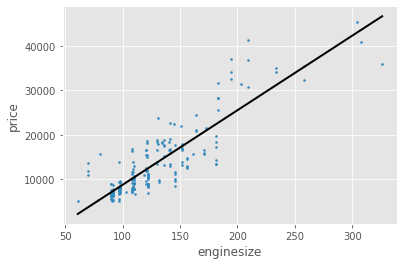

In [16]:
# Create arrays for features and target variable
X_e = car_data['enginesize'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_e = X_e.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_e), max(X_e)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_e, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Enginesize):",reg.score(X_e, y))

# Plot regression line
car_data.plot(kind="scatter", x ='enginesize', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Curbweight): 0.6977342414446954


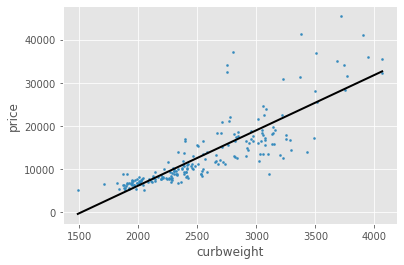

In [17]:
# Create arrays for features and target variable
X_c = car_data['curbweight'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_c = X_c.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_c), max(X_c)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_c, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Curbweight):",reg.score(X_c, y))

# Plot regression line
car_data.plot(kind="scatter", x ='curbweight', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Carwidth): 0.5765749108275359


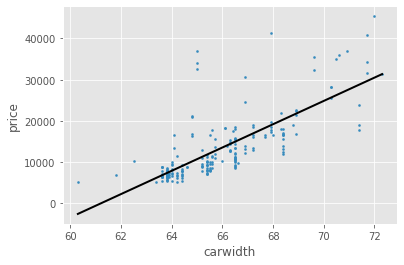

In [77]:
# Create arrays for features and target variable
X_d = car_data['carwidth'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_d = X_d.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_d), max(X_d)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_d, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Carwidth):",reg.score(X_d, y))

# Plot regression line
car_data.plot(kind="scatter", x ='carwidth', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Fueltype): 0.011168152991822278


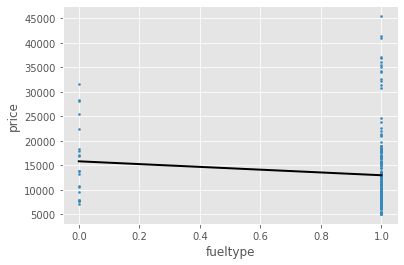

In [109]:
# Create arrays for features and target variable
X_d = car_data['fueltype'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_d = X_d.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_d), max(X_d)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_d, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Fueltype):",reg.score(X_d, y))

# Plot regression line
car_data.plot(kind="scatter", x ='fueltype', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Enginelocation): 0.10560764641545373


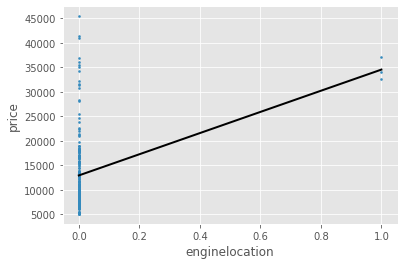

In [110]:
# Create arrays for features and target variable
X_d = car_data['enginelocation'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_d = X_d.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_d), max(X_d)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_d, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Enginelocation):",reg.score(X_d, y))

# Plot regression line
car_data.plot(kind="scatter", x ='enginelocation', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

## Multivariate Linear Regression

### Standardization

In [ ]:

scaler = StandardScaler()
scaler.fit(car_data)
car_data["New_data"] =scaler.transform(car_data)
car_data1.head()

Multiple linear regression would be run on the feature with R square greater than 0.6 based on the prominent features observed from the heatmap. 

In [94]:
# Create arrays for features and target variable
X = car_data[['horsepower','carwidth','curbweight','enginesize']].values
y = car_data["price"].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7758631573177659
Root Mean Squared Error: 3940.708295361663


## Lasso Regularization 

[-2.25451167e+01  1.96548416e+02  7.93756124e+01  1.03236578e+04
  1.35343878e+03 -1.56524569e+03 -1.26233729e+03  1.10287427e+03
  1.00889137e+04  1.41959034e+02 -3.68755539e+01  6.61973197e+02
  1.87547957e+02  2.33654539e+00  3.05903326e+02 -3.90970494e+02
  8.73280811e+01  1.09995551e+02 -1.25751236e+03 -2.01871936e+03
  8.29001331e+02  1.49278870e+01  1.33825290e+00 -9.06026950e+01
  0.00000000e+00]


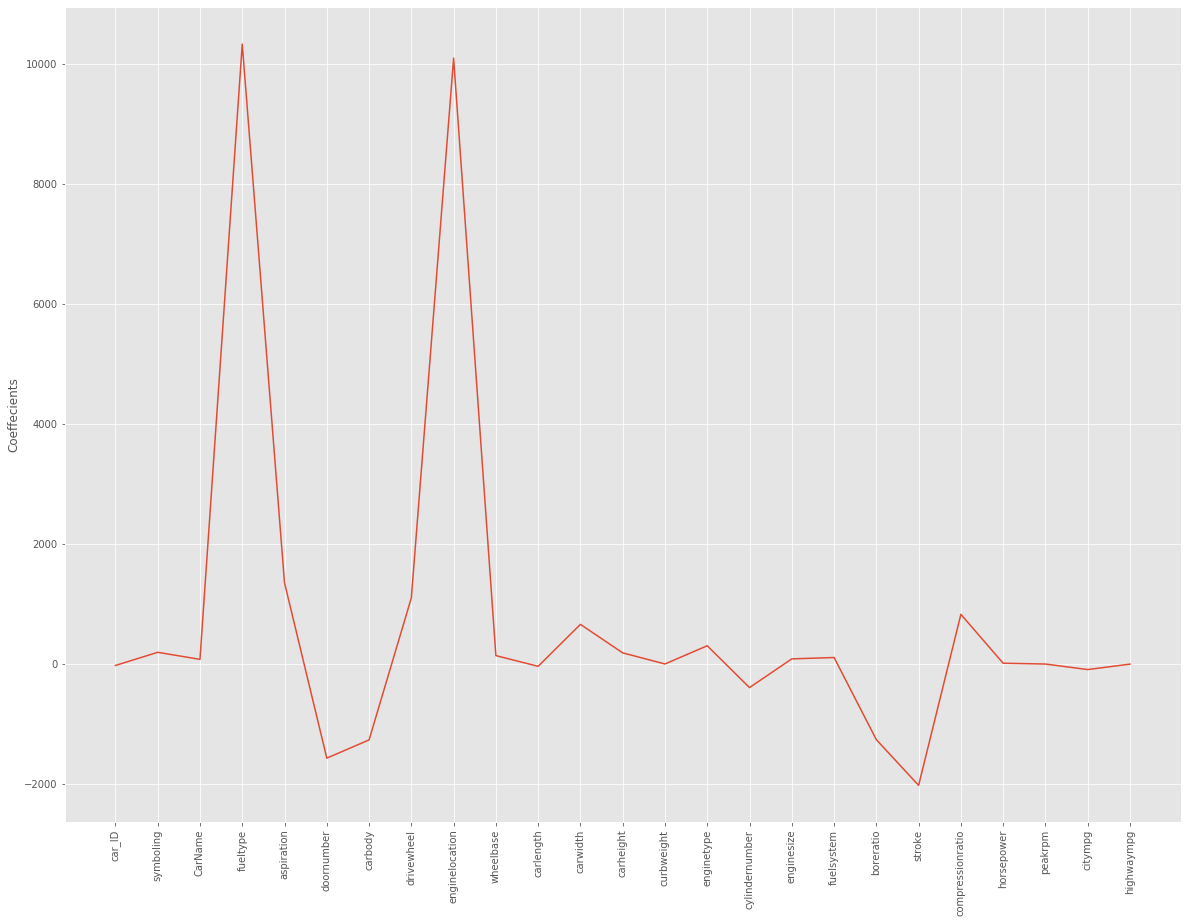

In [108]:
# Create arrays for features and target variable
#X = car_data.drop("cat_col",axis=1).values
X = car_data.drop("price" ,axis=1).values
y = car_data["price"].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Initiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso_fit = lasso.fit(X_train, y_train)

#Predict
lasso_predict = lasso.predict(X_test)

# Compute and print the coefficients
lasso.score(X_test, y_test)

names = car_data.drop("price",axis=1).columns

lasso_coef = lasso_fit.coef_
print(lasso_coef)

plt.figure(figsize=(20, 15))
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation =90)
_ = plt.ylabel("Coeffecients")

#plt.show()

# DataCamp_DataScience
Data Camp Data Science Exercises 

## [Introduction to Statistics](https://github.com/toyinolape/DataCamp_DataScience/tree/master/Statistics)
Statistics is the study of how to collect, analyze, and draw conclusions from data. It’s a hugely valuable tool that you can use to bring the future into focus and infer the answer to tons of questions. For example, what is the likelihood of someone purchasing your product, how many calls will your support team receive, and how many jeans sizes should you manufacture to fit 95% of the population? In this folder ther is a notebook that shows how, most situations are covered, using scatterplots to show the relationship between numeric values, and calculating correlation. Probability was also tackled, the backbone of statistical reasoning, and how to use Python to conduct a well-designed study to draw your own conclusions from data.

## [Pandas_Library](https://github.com/toyinolape/DataCamp_DataScience/tree/master/Pandas_Library)
pandas DataFrames are the most widely used in-memory representation of complex data collections within Python. Whether in finance, a scientific field, or data science, familiarity with pandas is essential. This repo shows you how to work with real-world datasets containing both string and numeric data, often structured around time series. I will also show how to perfomr powerful analysis, selection, and visualization techniques.


## [Supervised Learning with Scikit-Learn](https://github.com/toyinolape/DataCamp_DataScience/tree/master/Supervised_Learning)
Machine learning is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? In this folder ther are two notebooks [CLassfication](https://github.com/toyinolape/DataCamp_DataScience/blob/master/Supervised_Learning/Classification.ipynb) and [Linear Regression](https://github.com/toyinolape/DataCamp_DataScience/blob/master/Supervised_Learning/Linear_Regression.ipynb).  These notebooks show you how to build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. I'll be using scikit-learn, one of the most popular and user-friendly machine learning libraries for Python.

## [Feature Engineering for Machine Learning in Python](https://github.com/toyinolape/DataCamp_DataScience/tree/master/Feature_Engineering)
Feature engineering is the process of using data’s domain knowledge to create features that make machine learning algorithms work. It’s the act of extracting important features from raw data and transforming them into formats that are suitable for machine learning. To perform feature engineering, a data scientist combines domain knowledge (knowledge about a specific field) with math and programming skills to transform or come up with new features that will help a machine learning model perform better. Feature engineering is a practical area of machine learning and is one of the most important aspects of it.

## [Intoduction to SQL]()
SQL, which stands for Structured Query Language, is a language for interacting with data stored in something called a relational database.A relational database as a collection of tables. A table is just a set of rows and columns, like a spreadsheet, which represents exactly one type of entity. For example, a table might represent employees in a company or purchases made, but not both.
Each row, or record, of a table contains information about a single entity. For example, in a table representing employees, each row represents a single person. Each column, or field, of a table contains a single attribute for all rows in the table. For example, in a table representing employees, we might have a column containing first and last names for all employees.